## Plot position of the calibrator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from astropy.coordinates import SkyCoord
import astropy.units as u
%matplotlib inline

In [2]:
def readCal(ifile, fluxmin = 0.2):
    """Read a list of calibrators in CSV format from the Source Catalogue web interface
    Copy from ALMAQueryCal.py
    """

    listcal = []

    fcal = open(ifile)
    for line in fcal:
        if line[0] != "#":
            tok       = line.split(",")
            band      = tok[0].split(" ")[1]
            flux      = float(tok[7])
            name      = tok[13].split("|")[0]
            alpha2000 = float(tok[3])
            delta2000 = float(tok[5])

            if flux >= fluxmin:
                found = False
                for nameYet in listcal:
                    if nameYet[0] == name:
                        found = True

                if not found:
                    listcal.append([name, alpha2000, delta2000, flux])


    return(listcal)

Read the data

In [3]:
input_file = "CalAug2016.list"

In [4]:
data = readCal(input_file, fluxmin = 0.1) # change fluxmin

data_np = np.array(data)
name = data_np[:,0]
ra = data_np[:,1].astype(np.float)
dec = data_np[:,2].astype(np.float)
flux = data_np[:,3].astype(np.float)

In [5]:
# cmap = plt.cm.hot
# flux_log = np.log(flux)
# max_flux = flux_log.max()
# color = flux_log/max_flux

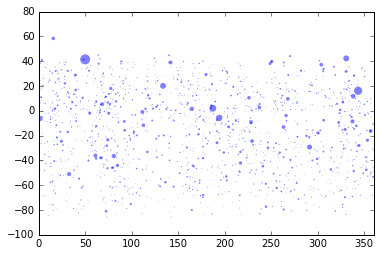

In [6]:
size = flux/flux.max()

plt.scatter(ra, dec, c='blue', s=size*100, lw=0, alpha=0.5)
plt.xlim([0., 360.])
plt.show()

Note: ALMA located at 23.0278° S, 67.7548° W

### Map projection plot
#### Equatorial coordinate

In [7]:
m = Basemap(projection='moll', lon_0=0) # center at 'longitude' 0

Shift range[-180, 180]

In [8]:
def shift180pm(alpha):
    return([x - 360 if x > 180 else x for x in alpha])

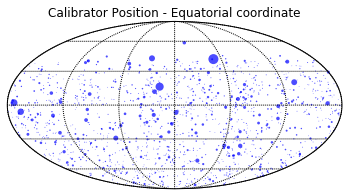

In [9]:
ra_shift = shift180pm(ra) # shift ra [-180, 180]
x, y = m(ra_shift, dec)
m.scatter(x, y, c='blue', s=size*100, lw=0, alpha=0.7)
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
plt.title("Calibrator Position - Equatorial coordinate")
plt.show()

#### Galactic coordinate

In [10]:
equ = SkyCoord(ra, dec, frame='icrs', unit='deg')
gal = equ.galactic

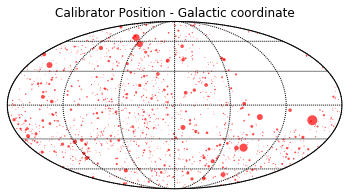

In [11]:
l_shift = shift180pm(gal.l.degree) # shift galactic longitude [-180, 180]
x, y = m(l_shift, gal.b.degree)
m.scatter(x, y, c='red', s=size*100, lw=0, alpha=0.7)
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
plt.title("Calibrator Position - Galactic coordinate")
plt.show()